In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:





# Display the preprocessed data
cust_df.head()

# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cust_df)

# Display the scaled data
scaled_df

# Step 3: Perform K-means clustering
k_means = KMeans(n_clusters=3)
k_means.fit(scaled_df)

# Get the cluster labels for each data point
cluster_labels = k_means.labels_

# Add cluster labels to the original data
data_df["Clus_kmeans"] = cluster_labels

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x='Avg_Mthly_Spend', y='No_Of_Visits', c='Clus_kmeans', data=data_df, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Average monthly spend')
plt.ylabel('No. of Visits')
plt.show()

# Step 5: Evaluate the clustering
# Get the inertia (within-cluster sum of squares) for the clustering
k_means.inertia_

# Use the elbow method to determine the optimal number of clusters
wss = []
for i in range(2, 11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_df)
    wss.append(k_means.inertia_)

# Plot the WSS curve
plt.plot(range(2, 11), wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.show()

# Step 6: Evaluate clustering using silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(scaled_df, cluster_labels)

# Calculate the silhouette width for each data point
sil_width = silhouette_samples(scaled_df, cluster_labels)


In [117]:
# Step 1: Read the data
data_df = pd.read_csv("Cust_Spend_Data_New.csv") 

In [118]:
data_df.head(10) # Display the first 10 rows of the data

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
5,6,Aide,3039,21,1,8,12
6,7,Alex,4676,22,3,8,13
7,8,Alexandria,7869,14,6,3,3
8,9,Alline,5585,21,2,10,12
9,10,Allyn,4589,23,2,8,9


In [119]:
#summary of the dataset

In [120]:
data_df.shape

(829, 7)

In [121]:
data_df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

Text(0, 0.5, 'No Of Visits')

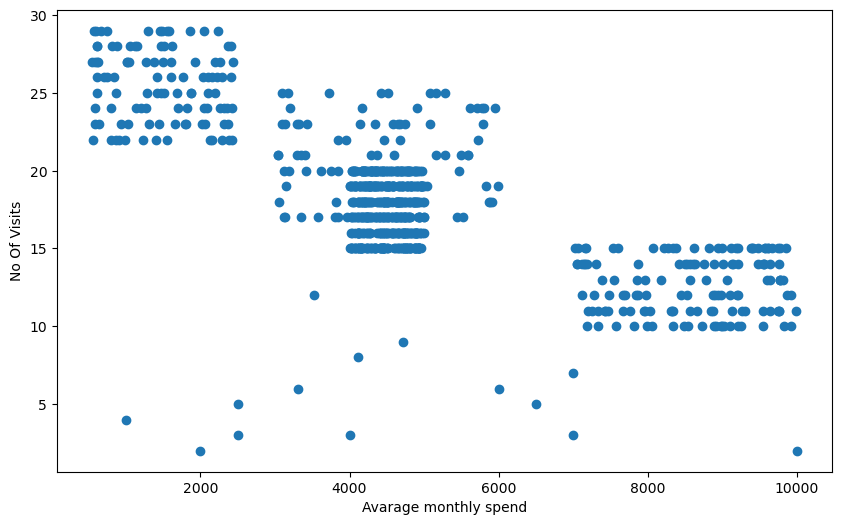

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(data_df.Avg_Mthly_Spend,data_df.No_Of_Visits)
plt.xlabel('Avarage monthly spend')
plt.ylabel('No Of Visits')

In [122]:
# Get descriptive statistics of the data
data_df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,415.000000,4801.276236,17.856454,3.961399,7.623643,8.338963
std,239.455981,2056.494189,4.367192,2.056204,3.665773,4.250284
min,1.000000,549.000000,2.000000,0.000000,1.000000,0.000000
25%,208.000000,4156.000000,15.000000,3.000000,6.000000,5.000000
50%,415.000000,4516.000000,18.000000,4.000000,7.000000,8.000000
75%,622.000000,4910.000000,20.000000,5.000000,8.000000,10.000000
max,829.000000,10000.000000,29.000000,10.000000,19.000000,20.000000


In [123]:
data_df.duplicated().sum()

0

In [124]:
# Step 2: Preprocess the data
cust_df = data_df.drop(['Name','Cust_ID'], axis=1)

In [149]:
cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
X = StandardScaler()

In [128]:
scaled_df = X.fit_transform(cust_df)

In [150]:
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [135]:
k_means = KMeans(n_clusters = 3)

In [136]:
k_means.fit(scaled_df)

KMeans(n_clusters=3)

In [137]:
k_means.cluster_centers_

array([[-0.15306858, -0.01772092, -0.08454068, -0.07441271, -0.07254261],
       [-1.58347673,  1.72317714, -1.43191388,  2.03918951,  1.97235654],
       [ 1.85065169, -1.23962417,  1.44715559, -1.24242494, -1.19931591]])

In [110]:
# Add cluster labels to the original data
data_df["Clus_kmeans"] = k_means.labels_

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Mthly_Spend', y='No_Of_Visits', hue='Clus_kmeans', data=data_df, palette='viridis', alpha=0.8)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='x', s=200)
plt.title('K-means Clustering')
plt.xlabel('Average monthly spend')
plt.ylabel('No. of Visits')
plt.show()

ValueError: Could not interpret value `Clus_kmeans` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

In [138]:
wss =[] 

In [140]:
for i in range(2,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_df)
    wss.append(k_means.inertia_)

In [141]:
wss

[2225.818078099467,
 1074.3823802989516,
 909.4457891579563,
 784.5624359391796,
 697.7964308882446,
 630.3521284920179,
 580.9502503458145,
 543.7023132090475,
 508.93772676921634]

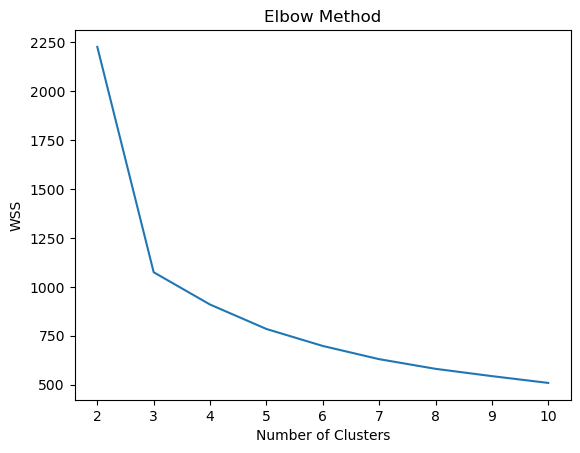

In [142]:
# Plotting the Within-Cluster Sum of Squares (WSS) curve
plt.plot(range(2, 11), wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.show()

In [143]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [144]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans
0,1,Abraham,1123,28,1,16,14,1
1,2,Adela,9818,13,5,2,5,2
2,3,Adelina,9824,10,10,2,2,2
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,1


In [145]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [146]:
silhouette_score(scaled_df,labels)

0.5863370901372584

In [69]:
sil_width = silhouette_samples(scaled_df,labels)

In [70]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,2,0.656055
1,2,Adela,9818,13,5,2,5,0,0.512424
2,3,Adelina,9824,10,10,2,2,0,0.582380
3,4,Adrian,3097,23,2,8,9,1,0.375197
4,5,Adrianna,817,28,1,17,17,2,0.703167


In [71]:
silhouette_samples(scaled_df,labels).min()

0.04131038567750352

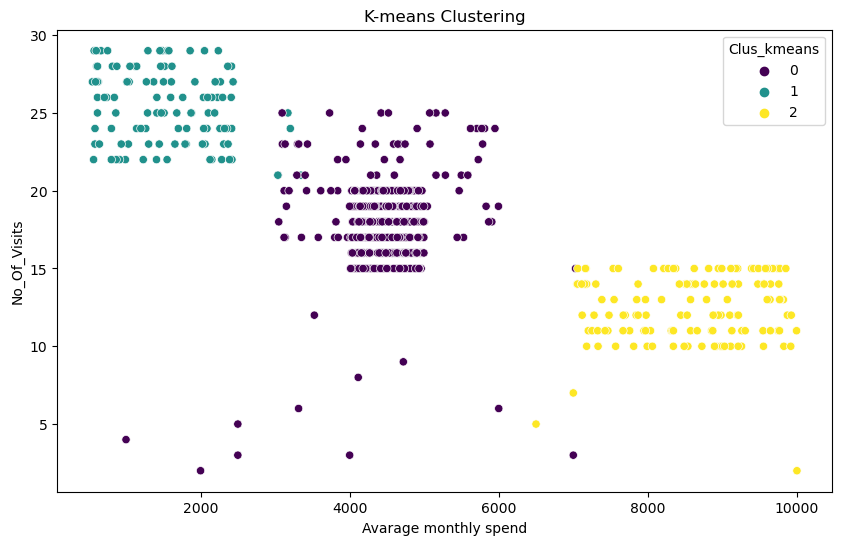

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Mthly_Spend', y='No_Of_Visits', hue='Clus_kmeans', data=data_df, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Avarage monthly spend')
plt.ylabel('No_Of_Visits')
plt.show()